In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV

from sklearn.inspection import permutation_importance

from sklearn.metrics import make_scorer, roc_auc_score
import os
%matplotlib inline

In [2]:
name = ['one', 'two', 'three']

In [24]:
value = []
for i in range(2):
    value.append(i)

In [23]:
df = pd.DataFrame({"A":[1, 2], "B":[1, 2]})

In [27]:
name = df.columns

In [29]:
name

Index(['A', 'B'], dtype='object')

In [33]:
value.append([3, 4])

In [35]:
value = [[1, 2], [3, 4]]

In [36]:
value

[[1, 2], [3, 4]]

In [37]:
pd.DataFrame(value, columns=name)


,A,B
0,1,2
1,3,4


In [38]:
pd.DataFrame(value)

,0,1
0,1,2
1,3,4


In [39]:
def score_func(y, y_pred):
    score = roc_auc_score(y, y_pred, multi_class="ovr")
    return score

my_scores = make_scorer(score_func=score_func, greater_is_better=True, needs_proba=True, needs_threshold=False)

In [40]:
os.getcwd()

'/Users/zhengyuanrui/Decoding_SALT/Decode_new/2_Data'

In [41]:
os.chdir("../../2_Data")

In [42]:
df_noref = pd.read_csv("/Users/zhengyuanrui/Decoding_SALT/Decode_new/2_Data/df_no_ref.csv")
df_selfref = pd.read_csv("/Users/zhengyuanrui/Decoding_SALT/Decode_new/2_Data/df_self_ref.csv")

In [43]:
df_noref.head()

,Subject,ExpNo,BlockNo,TrialNo,TrialNo1b,TrialNo2b,TrialNo3b,TrialNo4b,ACC,RT,...,Valence_G3b,Valence_B3b,Valence_N3b,ACC4b,RT4b,ismatch4b,Valence_G4b,Valence_B4b,Valence_N4b,label
0,1001,Exp1a,1,16,15,14,13,12,1,1065,...,1,0,0,1,865,0,1,0,0,2
1,1001,Exp1a,1,36,35,34,33,32,1,929,...,1,0,0,1,633,1,1,0,0,2
2,1001,Exp1a,1,49,48,47,46,45,0,880,...,0,1,0,1,592,1,1,0,0,1
3,1001,Exp1a,1,50,49,48,47,46,0,888,...,1,0,0,1,865,0,0,1,0,2
4,1001,Exp1a,1,51,50,49,48,47,0,777,...,1,0,0,1,648,1,1,0,0,0


In [44]:
df_selfref.head()

,Subject,ExpNo,BlockNo,TrialNo,TrialNo1b,TrialNo2b,TrialNo3b,TrialNo4b,Identity,ACC,...,Valence_G3b,Valence_B3b,Valence_N3b,ACC4b,RT4b,ismatch4b,Valence_G4b,Valence_B4b,Valence_N4b,label
0,3010,Exp3a,1,5,4,3,2,1,Self,1,...,0,1,0,1,822,1,0,0,1,1
1,3010,Exp3a,1,6,5,4,3,2,Other,1,...,0,1,0,0,660,1,0,1,0,2
2,3010,Exp3a,1,7,6,5,4,3,Self,1,...,0,0,1,0,608,1,0,1,0,0
3,3010,Exp3a,1,8,7,6,5,4,Other,0,...,0,0,1,1,747,1,0,0,1,0
4,3010,Exp3a,1,9,8,7,6,5,Self,1,...,0,1,0,1,657,0,0,0,1,0


<AxesSubplot: >

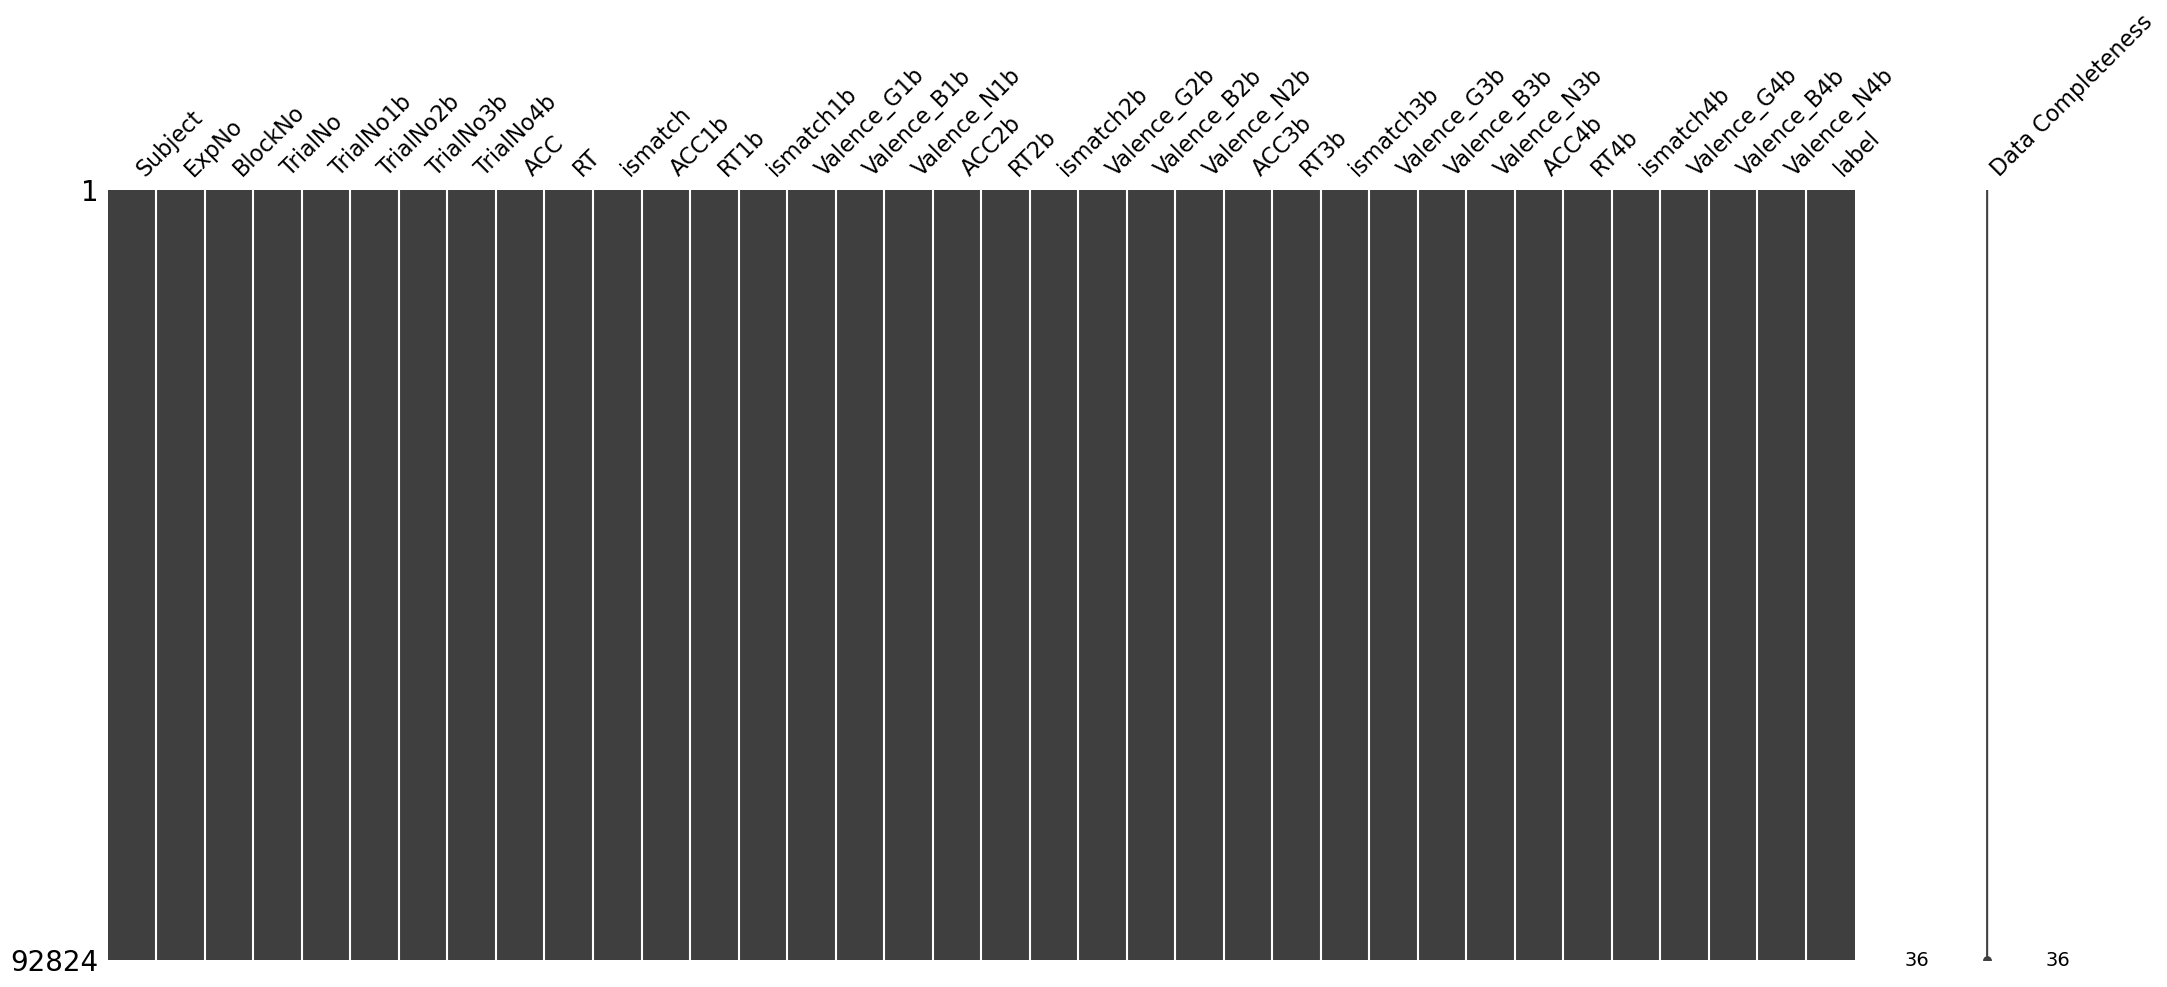

In [45]:
msno.matrix(df_noref, labels=True)

<AxesSubplot: >

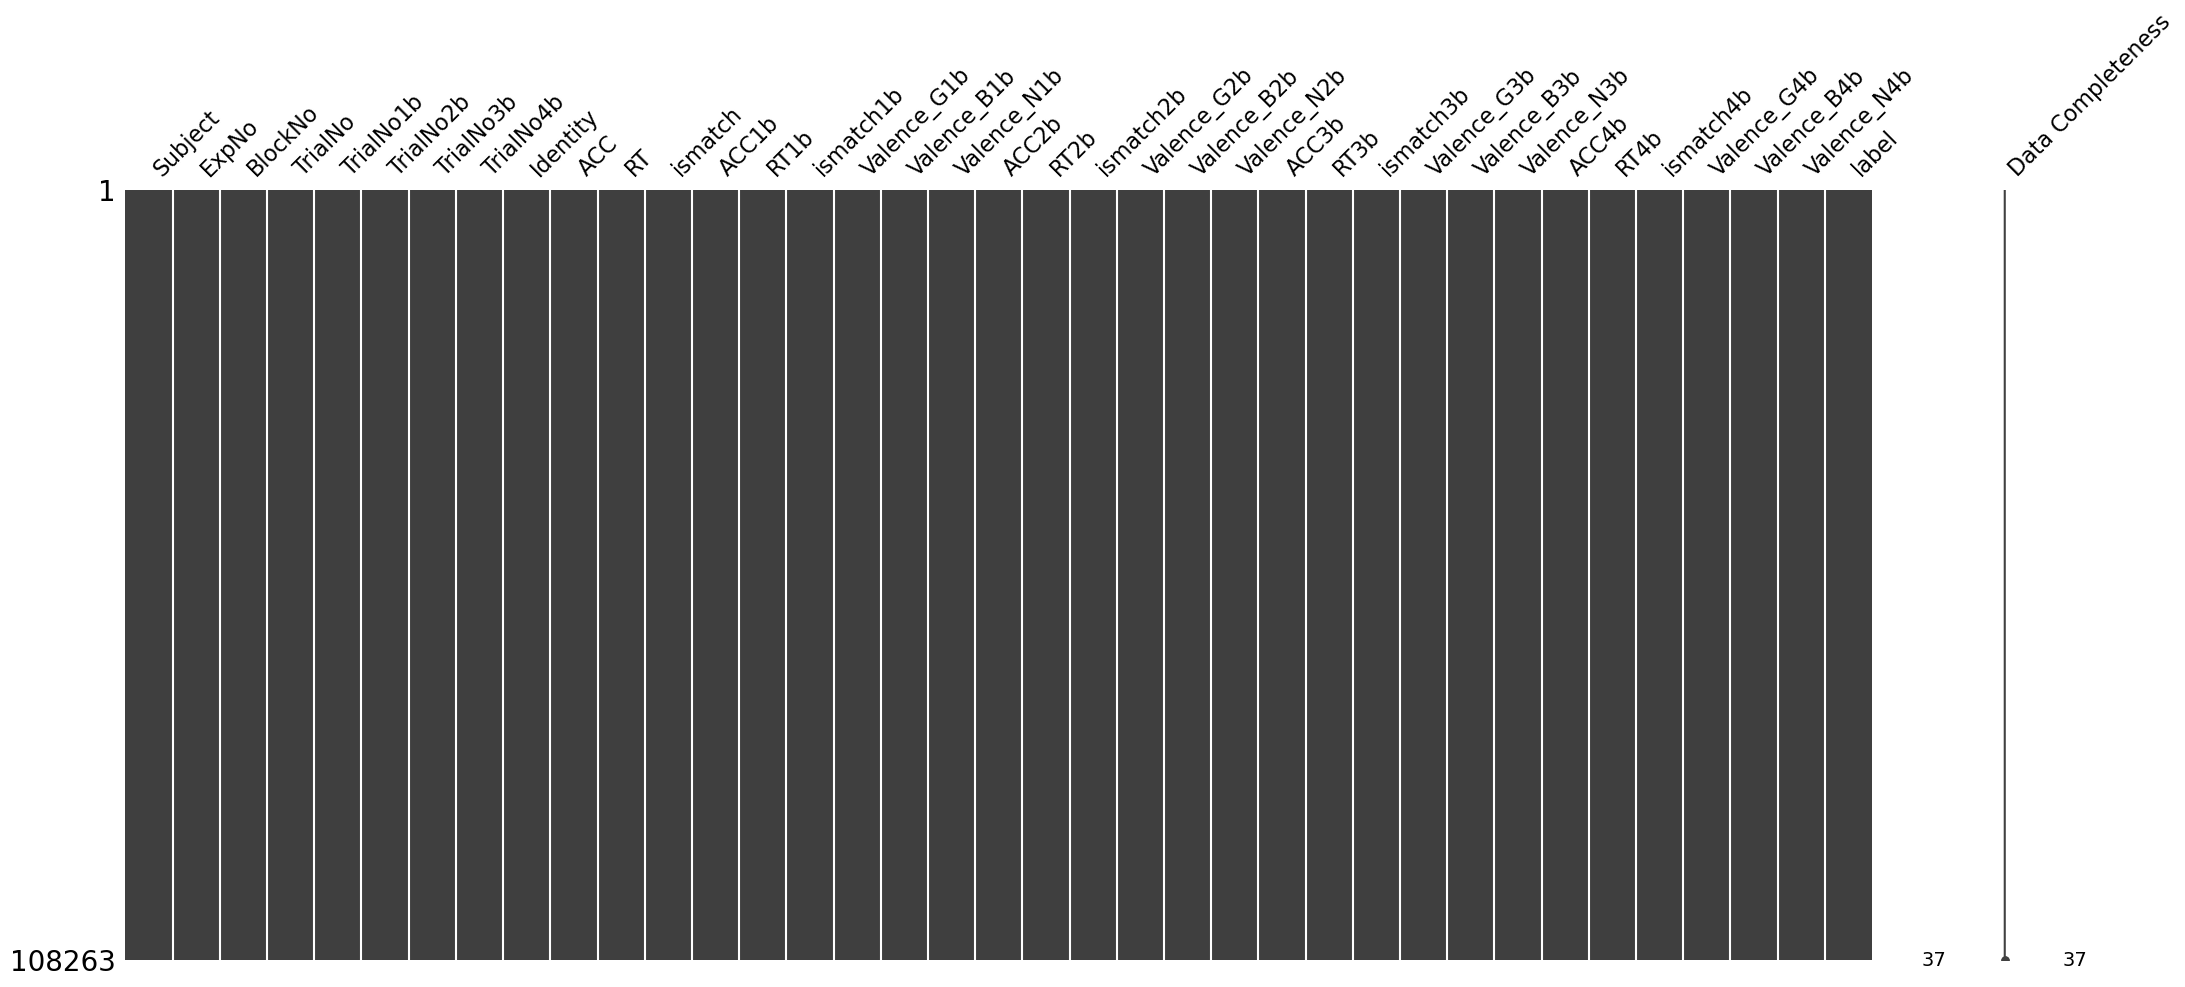

In [46]:
msno.matrix(df_selfref, labels=True)

In [47]:
X_norefb = df_noref.iloc[:, 11:-1]
X_selfrefb = df_selfref.iloc[:, 12:-1]


y_noref = df_noref["label"]
y_selfref = df_selfref["label"]

In [48]:
X_norefb

,ACC1b,RT1b,ismatch1b,Valence_G1b,Valence_B1b,Valence_N1b,ACC2b,RT2b,ismatch2b,Valence_G2b,...,ismatch3b,Valence_G3b,Valence_B3b,Valence_N3b,ACC4b,RT4b,ismatch4b,Valence_G4b,Valence_B4b,Valence_N4b
0,1,865,1,1,0,0,0,817,1,0,...,1,1,0,0,1,865,0,1,0,0
1,1,993,1,0,0,1,0,1033,1,0,...,0,1,0,0,1,633,1,1,0,0
2,1,776,0,1,0,0,1,648,1,1,...,0,0,1,0,1,592,1,1,0,0
3,0,880,1,0,0,1,1,776,0,1,...,1,1,0,0,1,865,0,0,1,0
4,0,888,1,0,1,0,0,880,1,0,...,0,1,0,0,1,648,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92819,1,784,0,0,1,0,1,804,0,1,...,1,1,0,0,0,716,0,0,0,1
92820,1,601,1,1,0,0,1,784,0,0,...,0,1,0,0,1,818,1,1,0,0
92821,1,624,0,0,1,0,1,601,1,1,...,0,0,1,0,1,804,0,1,0,0
92822,1,753,0,1,0,0,1,624,0,0,...,1,1,0,0,1,784,0,0,1,0


In [49]:
df_selfref.iloc[:, 12:-1]

,ACC1b,RT1b,ismatch1b,Valence_G1b,Valence_B1b,Valence_N1b,ACC2b,RT2b,ismatch2b,Valence_G2b,...,ismatch3b,Valence_G3b,Valence_B3b,Valence_N3b,ACC4b,RT4b,ismatch4b,Valence_G4b,Valence_B4b,Valence_N4b
0,1,747,1,0,0,1,0,608,1,0,...,1,0,1,0,1,822,1,0,0,1
1,1,657,0,0,0,1,1,747,1,0,...,1,0,1,0,0,660,1,0,1,0
2,1,631,0,0,1,0,1,657,0,0,...,1,0,0,1,0,608,1,0,1,0
3,1,678,0,1,0,0,1,631,0,0,...,0,0,0,1,1,747,1,0,0,1
4,0,561,0,1,0,0,1,678,0,1,...,0,0,1,0,1,657,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108258,0,680,1,1,0,0,1,824,0,0,...,0,1,0,0,1,645,1,1,0,0
108259,1,667,1,0,1,0,0,680,1,1,...,0,0,1,0,1,899,0,1,0,0
108260,0,801,1,0,0,1,1,667,1,0,...,1,1,0,0,1,824,0,0,1,0
108261,1,922,1,0,0,1,0,801,1,0,...,1,0,1,0,0,680,1,1,0,0


In [50]:
groups_no = df_noref["Subject"]
groups_self = df_selfref["Subject"]

In [51]:
groups_no

0        1001
1        1001
2        1001
3        1001
4        1001
         ... 
92819    5242
92820    5242
92821    5242
92822    5242
92823    5242
Name: Subject, Length: 92824, dtype: int64

In [52]:
logo = LeaveOneGroupOut()

In [53]:
for train, test in logo.split(X_norefb, y_noref, groups=groups_no):
    test_sub = np.unique(groups_no[test])[0]
    print(X_norefb.loc[train])

       ACC1b  RT1b  ismatch1b  Valence_G1b  Valence_B1b  Valence_N1b  ACC2b  \
184        0   937          1            0            0            1      1   
185        0   785          0            0            0            1      0   
186        0   881          1            0            1            0      0   
187        1   929          1            1            0            0      0   
188        0   753          1            0            1            0      1   
...      ...   ...        ...          ...          ...          ...    ...   
92819      1   784          0            0            1            0      1   
92820      1   601          1            1            0            0      1   
92821      1   624          0            0            1            0      1   
92822      1   753          0            1            0            0      1   
92823      1   665          1            0            0            1      1   

       RT2b  ismatch2b  Valence_G2b  ...  ismatch3b

In [54]:
groups_no[0]


1001

In [55]:
def lr_within_task(X, y, group, source):
    df_result = dict(subID=[], score=[], source=[], target=[])# source拟合的，target预测的condition
    feature_importance = []
    for train, test in logo.split(X, y, groups=group):
        test_sub = np.unique(group[test])[0]
        df_result["subID"].append(test_sub)
        
        logi = make_pipeline(
            MinMaxScaler(), 
            LogisticRegressionCV(Cs = np.logspace(-6, 3, 7), cv = 5, class_weight='balanced', 
                                 random_state=123, max_iter=5000, multi_class="ovr"))
        
        model = logi.fit(X=X.loc[train], y=y.loc[train])
        im = permutation_importance(model, X.loc[test], y.loc[test], scoring=my_scores, n_repeats=3, n_jobs=-1, random_state=123)
        feature_importance.append(im['importances_mean'])
        y_pred = model.predict_proba(X.loc[test])
        score = roc_auc_score(y.loc[test], y_pred, multi_class='ovr')

        df_result['score'].append(score)
        df_result['source'].append(source)
        df_result['target'].append(source)

    return pd.DataFrame(df_result), feature_importance


In [27]:
def lr_cross_task(X_source, y_source, X_target, y_target, target_group, source_name, target_name):
    df_result = dict(subID=[], score=[], source=[], target=[])# source拟合的，target预测的condition
    feature_importance = []
    logi = make_pipeline(
            MinMaxScaler(), 
            LogisticRegressionCV(Cs = np.logspace(-6, 3, 7), cv = 5, class_weight='balanced', 
                                 random_state=123, max_iter=5000, multi_class="ovr"))

    model = logi.fit(X=X_source, y=y_source)


    for sub in np.unique(target_group):
        idx_sub = target_group == sub
        feature_sub = X_target[idx_sub]
        label_sub = y_target[idx_sub]

        im = permutation_importance(model, feature_sub, label_sub, scoring=my_scores, n_repeats=20, n_jobs=-1, random_state=123)
        feature_importance.append(im['importances_mean'])

        y_pred = model.predict_proba(feature_sub)
        score = roc_auc_score(label_sub, y_pred, multi_class="ovr")

        df_result['subID'].append(sub)
        df_result["score"].append(score)
        df_result["source"].append(source_name)
        df_result["target"].append(target_name)


    return pd.DataFrame(df_result), feature_importance

In [58]:
logi = make_pipeline(
            MinMaxScaler(), 
            LogisticRegressionCV(Cs = np.logspace(-6, 3, 7), cv = 5, class_weight='balanced', 
                                 random_state=123, max_iter=5000, multi_class="ovr"))


logi.fit(X_norefb, y_noref)

logi.score(X_norefb, y_noref)

0.4126411272946652

In [85]:
logi.steps[-1][-1].coef_

array([[-1.36194353e-04,  4.73699412e-05,  6.49633731e-05,
        -1.64586656e-03,  7.74771250e-04,  8.71977887e-04,
        -6.31619410e-05,  6.82893722e-05, -4.46561539e-05,
        -1.67905300e-03,  8.00929516e-04,  8.79006061e-04,
        -3.37349546e-05,  6.15493884e-05, -1.19001464e-04,
        -1.40848908e-03,  7.23783660e-04,  6.85587991e-04,
        -6.20314696e-05,  2.39877129e-05, -7.75757022e-05,
        -1.20860488e-03,  7.56181638e-04,  4.53305813e-04],
       [ 5.56046752e-05, -3.34101017e-05, -1.89879352e-05,
         9.28052348e-04,  8.69272888e-04, -1.79742383e-03,
         4.60936101e-05, -1.06356447e-05, -3.52864601e-05,
         7.23259551e-04,  8.58748401e-04, -1.58210654e-03,
        -3.39869059e-05, -1.35501178e-05, -1.60674737e-05,
         7.50784622e-04,  6.69435588e-04, -1.42031880e-03,
         7.64517296e-05, -2.15662854e-05, -2.43705838e-05,
         6.08150625e-04,  6.36222517e-04, -1.24447173e-03],
       [ 8.05783986e-05, -1.39681421e-05, -4.59819928e

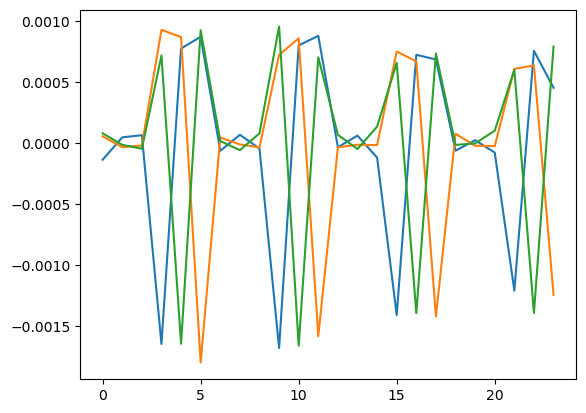

In [89]:
plt.plot(logi.steps[-1][-1].coef_[0])
plt.plot(logi.steps[-1][-1].coef_[1])
plt.plot(logi.steps[-1][-1].coef_[2])

In [59]:
im = permutation_importance(logi, X_norefb, y_noref, scoring=my_scores, n_repeats=20, n_jobs=-1, random_state=123)

In [83]:
im

,ACC1b,RT1b,ismatch1b,Valence_G1b,Valence_B1b,Valence_N1b,ACC2b,RT2b,ismatch2b,Valence_G2b,...,ismatch3b,Valence_G3b,Valence_B3b,Valence_N3b,ACC4b,RT4b,ismatch4b,Valence_G4b,Valence_B4b,Valence_N4b
0,1,865,1,1,0,0,0,817,1,0,...,1,1,0,0,1,865,0,1,0,0
1,1,993,1,0,0,1,0,1033,1,0,...,0,1,0,0,1,633,1,1,0,0
2,1,776,0,1,0,0,1,648,1,1,...,0,0,1,0,1,592,1,1,0,0
3,0,880,1,0,0,1,1,776,0,1,...,1,1,0,0,1,865,0,0,1,0
4,0,888,1,0,1,0,0,880,1,0,...,0,1,0,0,1,648,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92819,1,784,0,0,1,0,1,804,0,1,...,1,1,0,0,0,716,0,0,0,1
92820,1,601,1,1,0,0,1,784,0,0,...,0,1,0,0,1,818,1,1,0,0
92821,1,624,0,0,1,0,1,601,1,1,...,0,0,1,0,1,804,0,1,0,0
92822,1,753,0,1,0,0,1,624,0,0,...,1,1,0,0,1,784,0,0,1,0


In [76]:
ax = np.arange(1, len(im['importances_mean']))

<ErrorbarContainer object of 3 artists>

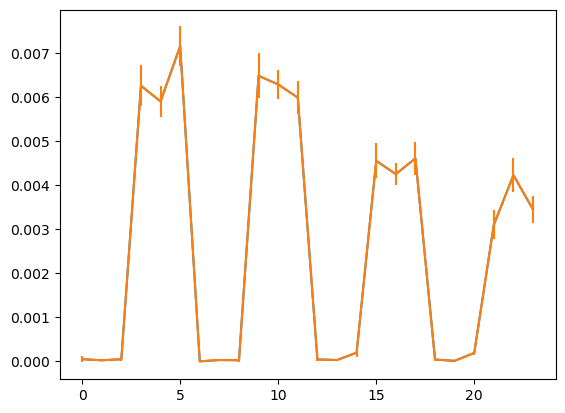

In [82]:
plt.plot(im['importances_mean'])
plt.errorbar(np.arange(im['importances_mean'].shape[0]), im["importances_mean"], im["importances_std"])

In [73]:
np.arange(1, len(im['importances_mean']))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [24]:
df_im_no = pd.DataFrame(np.array(im_no), columns=norefcolb)
df_im_no

,ACC1b,RT1b,ismatch1b,Valence_G1b,Valence_B1b,Valence_N1b,ACC2b,RT2b,ismatch2b,Valence_G2b,...,ismatch3b,Valence_G3b,Valence_B3b,Valence_N3b,ACC4b,RT4b,ismatch4b,Valence_G4b,Valence_B4b,Valence_N4b
0,0.002539,-0.000004,0.000276,0.032793,0.007048,0.004065,-0.001163,0.000268,0.000928,0.022588,...,0.001264,0.020251,0.004579,0.017100,-0.000895,0.000049,0.001148,0.006366,-0.000275,0.012011
1,-0.000281,-0.000098,0.000019,-0.008803,0.006396,0.002786,0.000053,-0.000917,-0.002915,-0.014823,...,-0.000012,0.003414,0.009390,-0.006218,0.000710,-0.000323,0.001141,-0.001307,-0.000373,-0.007516
2,0.000293,-0.000113,-0.000233,0.029712,0.010692,0.014815,-0.000246,0.000226,0.001982,0.020014,...,0.000699,0.006297,0.002415,0.005273,-0.000104,-0.000139,0.000162,0.006072,0.009310,0.010272
3,0.000542,0.001137,-0.000288,-0.004244,0.016786,0.012462,0.000151,0.001725,0.000526,0.008845,...,0.000115,0.012746,0.005129,0.013310,-0.000511,-0.000484,-0.000307,0.005376,0.007681,-0.002180
4,-0.001358,-0.000448,0.000011,0.002900,0.034138,0.038367,0.000002,0.000786,-0.000999,0.021475,...,0.003562,0.011715,0.015409,0.014332,0.000328,-0.000087,-0.001623,0.007317,0.003726,0.010152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.000827,0.000124,0.000112,0.006184,0.003606,0.012473,-0.000104,0.000622,-0.000044,0.005617,...,0.000528,0.001748,0.008702,0.007448,-0.000193,-0.000019,-0.001043,0.004571,0.006065,0.008363
160,-0.000245,0.000173,0.000048,0.010043,0.002679,0.007984,-0.000064,0.000118,0.000511,0.008730,...,-0.000106,0.005419,0.001389,0.004810,0.000137,-0.000044,0.000482,0.002167,0.014319,0.007245
161,-0.000296,0.000251,0.000127,-0.003203,-0.002136,0.003650,0.000010,-0.000116,-0.000334,0.001076,...,0.000407,0.005949,0.007803,0.005515,0.000149,-0.000209,0.000230,0.003169,0.004249,0.001913
162,-0.001822,0.000097,0.000025,-0.002784,0.007645,0.005087,-0.000057,0.000450,-0.000320,-0.000616,...,0.000026,-0.003509,0.002564,0.002476,0.000275,-0.000660,-0.000785,-0.001289,0.009050,0.003855


In [27]:
#No ref to self ref trial back
df_cross1, im_cross1 = lr_cross_task(X_source=X_norefb, y_source=y_noref, X_target=X_selfrefb, y_target=y_selfref, target_group=groups_self, source_name="No_Ref", target_name="Self_Ref")
#self to no ref trial back
df_cross2, im_cross2 = lr_cross_task(X_source=X_selfrefb, y_source=y_selfref, X_target=X_norefb, y_target=y_noref, target_group=groups_no, source_name="Self_Ref", target_name="No_Ref")

In [30]:
df_score = pd.concat([score_no, score_self])

In [33]:
df_score.to_csv("LR_withinscore.csv")

In [34]:
df_cross_score = pd.concat([df_cross1, df_cross2])

In [35]:
df_cross_score.to_csv("LR_crossscore.csv")

In [51]:
df_im_no = pd.DataFrame(im_no, columns=norefcolb)
df_im_no["subj_idx"] = np.arange(1, len(im_no)+1)
df_im_no["source"] = "No_Ref"
df_im_no["target"] = "No_Ref"

df_im_self = pd.DataFrame(im_self, columns=selfrefcolb)
df_im_self["subj_idx"] = np.arange(1, len(im_self)+1)
df_im_self["source"] = "Self_Ref"
df_im_self["target"] = "Self_Ref"

In [59]:
im_no_long = pd.melt(df_im_no, id_vars=["subj_idx", "source", "target"])
im_self_long = pd.melt(df_im_self, id_vars=["subj_idx", "source", "target"])
im_within = pd.concat([im_no_long, im_self_long])
im_within

,subj_idx,source,target,variable,value
0,1,No_Ref,No_Ref,ACC1b,0.002539
1,2,No_Ref,No_Ref,ACC1b,-0.000281
2,3,No_Ref,No_Ref,ACC1b,0.000293
3,4,No_Ref,No_Ref,ACC1b,0.000542
4,5,No_Ref,No_Ref,ACC1b,-0.001358
...,...,...,...,...,...
4675,191,Self_Ref,Self_Ref,Valence_N4b,0.015172
4676,192,Self_Ref,Self_Ref,Valence_N4b,0.019057
4677,193,Self_Ref,Self_Ref,Valence_N4b,0.021818
4678,194,Self_Ref,Self_Ref,Valence_N4b,0.017979


In [53]:
im_within.to_csv("importance_within.csv")

In [56]:
df_im_cross1 = pd.DataFrame(im_cross1, columns=selfrefcolb)
df_im_cross1["subj_idx"] = np.arange(1, len(im_cross1)+1)
df_im_cross1["source"] = "No_Ref"
df_im_cross1["target"] = "Self_Ref"

df_im_cross2 = pd.DataFrame(im_cross2, columns=norefcolb)
df_im_cross2["subj_idx"] = np.arange(1, len(im_cross2)+1)
df_im_cross2["source"] = "Self_Ref"
df_im_cross2["target"] = "No_Ref"

In [57]:
im_cross1_long = pd.melt(df_im_cross1, id_vars=["subj_idx", "source", "target"])
im_cross2_long = pd.melt(df_im_cross2, id_vars=["subj_idx", "source", "target"])
im_cross = pd.concat([im_cross1_long, im_cross2_long])
im_cross

In [60]:
im_cross.to_csv("importance_cross.csv")